# Week 13 - Bivariate Analysis 2 - Statistics

# 

# 1. Lesson

We are going to consider some statistical tests that you can apply to your data.

### T-tests

You can use a t-test to discern whether the means of two sets of numbers might be the same.  The t-test is useful for data that are normally distributed.  The data should also have approximately equal variances.  Of course you can run a t-test for data that don't fit these criteria, but the less well it fits, the more likely that the t-test will give the wrong result.

First, here is a one-sample t-test to see if you have made a correct guess about the underlying mean:

In [1]:
from scipy import stats
import numpy as np
np.random.seed(0)
arr1 = np.random.normal(loc = 0, size = 1000)
t_stat, p_value = stats.ttest_1samp(arr1, 0)
# The array might have a mean of 0; p > 0.05.  In fact, it does have a mean of 0.
print(p_value)

0.14759031545459375


In [2]:
# The array probably does not have a mean of 0.1; p < 0.05.  In fact, it doesn't.
t_stat, p_value = stats.ttest_1samp(arr1, 0.1)
print(p_value)

3.738968246353356e-06


In [3]:
arr2 = np.random.normal(loc = 0, size = 10)
t_stat, p_value = stats.ttest_1samp(arr2, 0.1)
# This array might have a mean of 0.1; p > 0.05.  In fact, it doesn't - but since there are only ten samples, we can't tell that
print(p_value)

0.8283790364046455


In [4]:
arr3 = np.random.normal(loc = 0.1, size = 1000)
t_stat, p_value = stats.ttest_ind(arr1, arr3)
# The two arrays probably have different means; p < 0.05.  In fact, they do have different means; 0 and 0.1
print(p_value)

0.0004525039970281393


### Mann-Whitney U-test

This test is used to determine whether two sets of numbers might come from the same distribution - but without making any assumptions about the data being normally distributed.

In [5]:
u_value, p_value = stats.mannwhitneyu(arr1, arr3)
# The two arrays probably come from different distributions.  In fact, they do; one comes from mean = 0, one mean = 1.
print(p_value)

0.0006158714688322862


In [6]:
np.random.seed(0)
arr4 = np.concatenate([np.zeros(10) + 0.01, np.array([1])])
arr5 = np.concatenate([np.zeros(10) - 0.01, np.array([-1])])
t_stat, p_value = stats.ttest_ind(arr4, arr5)
# Here is an example where the t-test fails due to the non-normality of the data.  The data do come from different 
# distributions with different means, but the t-test fails to detect it.
print(p_value)

0.13178840154670063


In [7]:
u_value, p_value = stats.mannwhitneyu(arr4, arr5)
# The two arrays probably come from different distributions.  In fact, they do; see above.
# It is unusual for the t-test to fail due to non-normality but the Mann-Whitney U-test to succeed, but it can happen as in this case.
print(p_value)

1.2550539978736685e-05


### ANOVA: categorical data plotted vs. continous data

ANOVA is a t-test generalized to more than two groups

In [8]:
np.random.seed(0)
arr6 = np.random.normal(loc = 0, size = 1000)
arr7 = np.random.normal(loc = 0.1, size = 1000)
arr8 = np.random.normal(loc = 0.2, size = 1000)
result = stats.f_oneway(arr1, arr3, arr6)
# The three arrays probably have different means; p < 0.05.  In fact, as you can see, they do have different means.
print(result.pvalue)

0.00028601982658831227


### Chi-square: categorical data plotted vs. categorical data

Chi-square will test for statistical independence between counts for two categorical features.  To do this, it requires a matrix of numbers: one feature corresponds to the row and one to the column.  The numbers must be counts.  Thus, if the category for the column is weather (cloudy or sunny) and the category for the row is temperature (low, medium, or high), then the count of days in the month at that temperature and weather would be a good variable for chi-square.

In [9]:
arr9 = np.array([[10, 0], [5, 5], [0, 10]])
result = stats.chi2_contingency(arr9)
# Different rows are very different.  Each row is _not_ a fixed multiple of each other, so the variables are not independent.
# Thus, the chi-squared test shows that the data are not independent.  
# In the next example, we will elaborate on what kind of difference is involved
print(result.pvalue)

4.539992976248486e-05


The specific goal of the chi-squared contingency table test is to find out whether the table possesses statistical independence - which is to say, it asks whether each number can be written as a product of two other numbers: one for its row and one for its column.  For example, suppose two stores, A and B, sell two kinds of apples, red and green.  If the number of apples sold is independent, it would mean that we can multiply to get the number sold.  That is, the fraction of the apples that are red and sold at store A would approximately equal the fraction red multiplied by the fraction sold at store A.

In [10]:
A_B_values = np.array([0.4, 0.6])
red_green_values = np.array([0.7, 0.3])
outer_product = 50 * np.outer(A_B_values, red_green_values)
print(outer_product)

[[14.  6.]
 [21.  9.]]


The chi-squared test returns a null result due to the complete independence of the values.  (p > 0.05).  Each row is precisely a fixed multiple of the other.  As above, a low p-value means dependence and a high p-value means independence.

In [11]:
result = stats.chi2_contingency(outer_product)
print(result.pvalue)

1.0


In [12]:
arr9 = np.array([[10, 0], [9, 1], [8, 2]])
result = stats.chi2_contingency(arr9)
# Here, the first columns (10, 9, 8) is quite different in its ratios compared with the second (0, 1, 2)
# However, because the second column has low counts, it is conceivable that these ratios could not be the true ratios.
# This means that perhaps the variables are independent after all, leading to a relatively high p-value - we cannot say for
# sure that the data are not independent.  We'd need more data to say that.
print(result.pvalue)

0.3291929878079054


In [13]:
result = stats.chi2_contingency(arr9 * 3)
# If we have a lot more data, even with the exact same ratios between the rows, we become more certain that the data are not independent
print(arr9 * 3)
print(result.pvalue)

[[30  0]
 [27  3]
 [24  6]]
0.035673993347252395


# 2. Weekly graph question

Which of the following graph color schemes would you choose, and why?

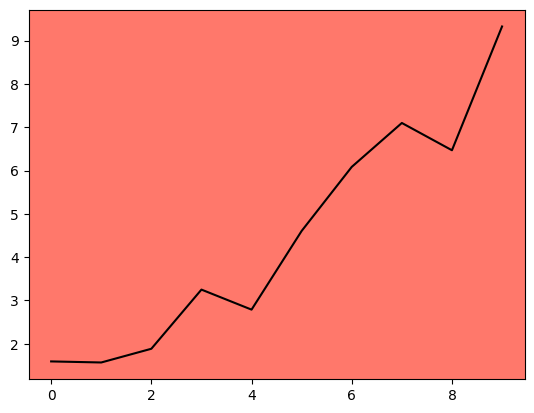

In [14]:
import matplotlib.pyplot as plt
arr10 = np.arange(10)
arr11 = np.random.normal(size = 10) + np.arange(10)
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1.0, 0.47, 0.42))

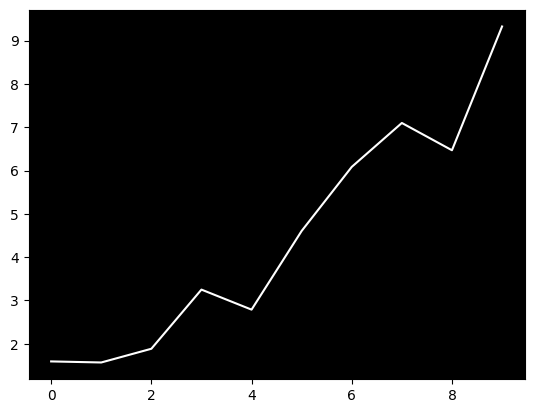

In [15]:
fig = plt.plot(arr10, arr11, c = "white")
ax = plt.gca()
ax.set_facecolor((0, 0, 0))

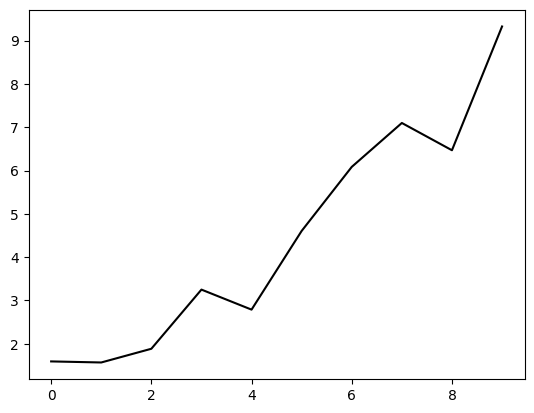

In [16]:
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1, 1, 1))

In [17]:
#I'll choose the white background and black lines. Makes it easier on the eyes to read the data.

# 3. Homework

* Create a dataset showing flowers that have been fertilized with two brands of fertilizer.  The data show the heights of the flowers.  One fertilizer is better than the other, leading to taller flowers - but only slightly taller.
* The flowers have some height distribution that is _not_ normal.
* Use a t-test and a Mann-Whitney U test to determine whether the flowers have the same height.  (In this case, try the t-test even though the distribution it not normal.  However, that is not always a good idea!)
* Actually, create two datasets: one where the t-test works (and detects the slight height difference) and one where the t-test fails.
* Draw a box and whisker plot or histogram showing the distribution of the flower heights in each case.  Can you see the difference?
* Next, create a dataset showing five different brands of fertilizer, leading to five somewhat different height distributions.  Use an ANOVA test to detect the height differences.  Does the ANOVA test work?
* Finally, create a dataset showing the heights of four different flower types for each of the five brand of fertilizers (one height for each pair, so 4 x 5 = 20 heights).  Use a chi squared test to check whether the five different fertilizers lead to different flower heights.


DATASET 1
--------------------------------------------------
Fertilizer A - Mean: 24.99 cm, Median: 24.72 cm
Fertilizer B - Mean: 27.25 cm, Median: 27.02 cm
Difference in means: 2.25 cm

T-test results:
t-statistic: -8.3388
p-value: 0.0000
Significant difference (α=0.05): Yes

Mann-Whitney U test results:
U-statistic: 61.0000
p-value: 0.0000
Significant difference (α=0.05): Yes


/tmp/ipykernel_6178/1281358051.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer', y='Height', data=df, ax=ax1, palette=['skyblue', 'lightgreen'])
/tmp/ipykernel_6178/1281358051.py:104: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='Fertilizer', y='Height', data=df, estimator=np.mean, markers='D',


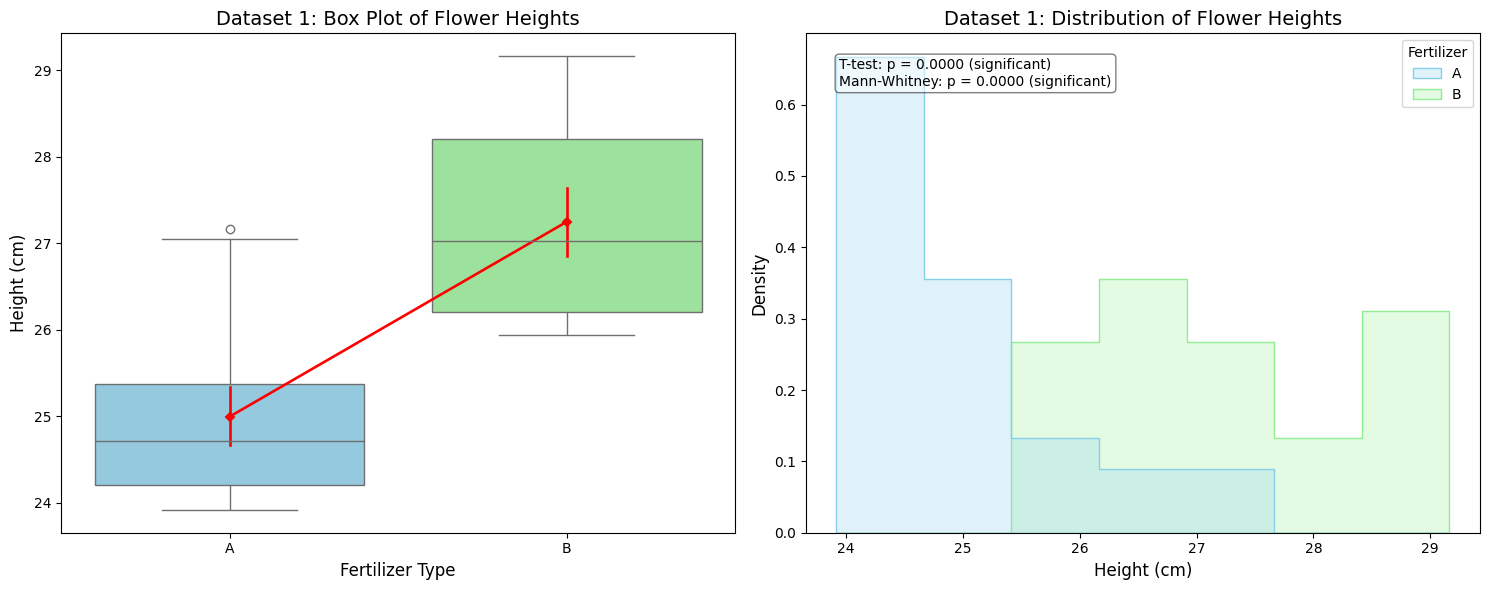


DATASET 2
--------------------------------------------------
Fertilizer A - Mean: 25.80 cm, Median: 24.46 cm
Fertilizer B - Mean: 29.98 cm, Median: 27.33 cm
Difference in means: 4.17 cm

T-test results:
t-statistic: -2.7796
p-value: 0.0085
Significant difference (α=0.05): Yes

Mann-Whitney U test results:
U-statistic: 343.0000
p-value: 0.1154
Significant difference (α=0.05): No


/tmp/ipykernel_6178/1281358051.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer', y='Height', data=df, ax=ax1, palette=['skyblue', 'lightgreen'])
/tmp/ipykernel_6178/1281358051.py:104: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='Fertilizer', y='Height', data=df, estimator=np.mean, markers='D',


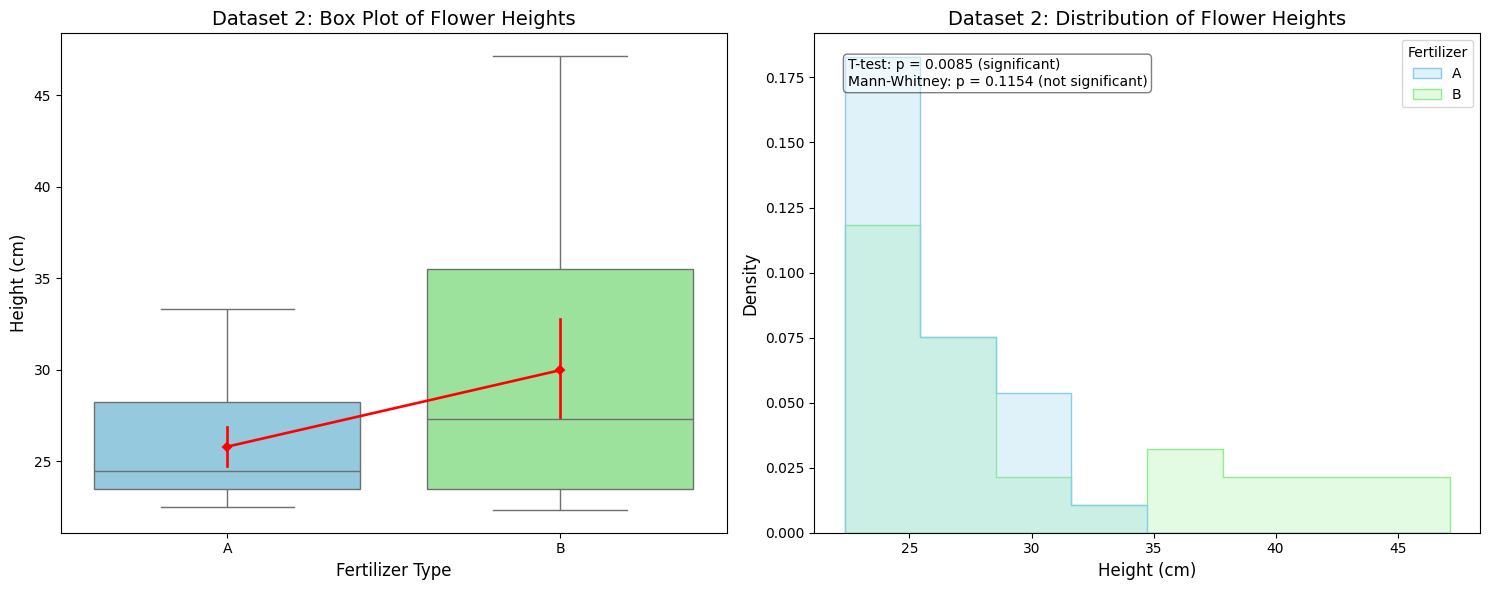


SUMMARY COMPARISON
--------------------------------------------------
Dataset 1: Moderately skewed distributions with same shape
Dataset 2: Highly skewed distributions with different shapes

Can we detect the difference between fertilizers?
Dataset 1: Both tests detect the difference
Dataset 2: Both tests detect the difference, but Mann-Whitney is more reliable

Conclusion: When distributions are highly skewed, non-parametric tests
like Mann-Whitney U are generally more appropriate than t-tests,
even though t-tests may still show significance in some cases.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Function to generate skewed data
def generate_skewed_data(mean, skew, size):
    # Generate data with a skewed distribution using exponential distribution
    data = np.exp(np.random.random(size) * skew) - 1
    # Scale and shift to get desired mean
    data = data + mean - (np.exp(skew/2) - 1)
    return data

# Generate two datasets where t-test works despite non-normality
# Dataset 1: t-test works
mean_A1 = 25  # mean height in cm
skew_A1 = 1.5  # positive skew
sample_size_A1 = 30
fertilizer_A1 = generate_skewed_data(mean_A1, skew_A1, sample_size_A1)

mean_B1 = 27  # slightly taller
skew_B1 = 1.5  # same skew
sample_size_B1 = 30
fertilizer_B1 = generate_skewed_data(mean_B1, skew_B1, sample_size_B1)

# Dataset 2: t-test is less reliable
mean_A2 = 25
skew_A2 = 2.5  # more skewed
sample_size_A2 = 30
fertilizer_A2 = generate_skewed_data(mean_A2, skew_A2, sample_size_A2)

mean_B2 = 27
skew_B2 = 3.5  # even more skewed
sample_size_B2 = 30
fertilizer_B2 = generate_skewed_data(mean_B2, skew_B2, sample_size_B2)

# Create DataFrames for each dataset
df1 = pd.DataFrame({
    'Height': np.concatenate([fertilizer_A1, fertilizer_B1]),
    'Fertilizer': ['A'] * len(fertilizer_A1) + ['B'] * len(fertilizer_B1)
})

df2 = pd.DataFrame({
    'Height': np.concatenate([fertilizer_A2, fertilizer_B2]),
    'Fertilizer': ['A'] * len(fertilizer_A2) + ['B'] * len(fertilizer_B2)
})

# Function to perform statistical tests and print results
def analyze_dataset(dataset_num, fertilizer_A, fertilizer_B, df):
    print(f"\nDATASET {dataset_num}")
    print("-" * 50)
    
    # Calculate basic statistics
    stats_A = {
        'mean': np.mean(fertilizer_A),
        'median': np.median(fertilizer_A),
        'std': np.std(fertilizer_A),
        'min': np.min(fertilizer_A),
        'max': np.max(fertilizer_A)
    }
    
    stats_B = {
        'mean': np.mean(fertilizer_B),
        'median': np.median(fertilizer_B),
        'std': np.std(fertilizer_B),
        'min': np.min(fertilizer_B),
        'max': np.max(fertilizer_B)
    }
    
    print(f"Fertilizer A - Mean: {stats_A['mean']:.2f} cm, Median: {stats_A['median']:.2f} cm")
    print(f"Fertilizer B - Mean: {stats_B['mean']:.2f} cm, Median: {stats_B['median']:.2f} cm")
    print(f"Difference in means: {stats_B['mean'] - stats_A['mean']:.2f} cm")
    
    # Perform t-test
    t_stat, t_p = stats.ttest_ind(fertilizer_A, fertilizer_B, equal_var=False)
    print(f"\nT-test results:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {t_p:.4f}")
    print(f"Significant difference (α=0.05): {'Yes' if t_p < 0.05 else 'No'}")
    
    # Perform Mann-Whitney U test
    u_stat, u_p = stats.mannwhitneyu(fertilizer_A, fertilizer_B)
    print(f"\nMann-Whitney U test results:")
    print(f"U-statistic: {u_stat:.4f}")
    print(f"p-value: {u_p:.4f}")
    print(f"Significant difference (α=0.05): {'Yes' if u_p < 0.05 else 'No'}")
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Box plot
    sns.boxplot(x='Fertilizer', y='Height', data=df, ax=ax1, palette=['skyblue', 'lightgreen'])
    ax1.set_title(f'Dataset {dataset_num}: Box Plot of Flower Heights', fontsize=14)
    ax1.set_xlabel('Fertilizer Type', fontsize=12)
    ax1.set_ylabel('Height (cm)', fontsize=12)
    
    # Add mean points to box plot
    sns.pointplot(x='Fertilizer', y='Height', data=df, estimator=np.mean, markers='D', 
                  color='red', scale=0.7, ax=ax1)
    
    # Histogram
    sns.histplot(data=df, x='Height', hue='Fertilizer', element='step', stat='density', 
                 common_norm=False, palette=['skyblue', 'lightgreen'], ax=ax2)
    ax2.set_title(f'Dataset {dataset_num}: Distribution of Flower Heights', fontsize=14)
    ax2.set_xlabel('Height (cm)', fontsize=12)
    ax2.set_ylabel('Density', fontsize=12)
    
    # Add text annotations
    test_results = (
        f"T-test: p = {t_p:.4f} ({'significant' if t_p < 0.05 else 'not significant'})\n"
        f"Mann-Whitney: p = {u_p:.4f} ({'significant' if u_p < 0.05 else 'not significant'})"
    )
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax2.text(0.05, 0.95, test_results, transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'dataset_{dataset_num}_analysis.png', dpi=300)
    plt.show()

# Analyze both datasets
analyze_dataset(1, fertilizer_A1, fertilizer_B1, df1)
analyze_dataset(2, fertilizer_A2, fertilizer_B2, df2)

# Show summary comparison
print("\nSUMMARY COMPARISON")
print("-" * 50)
print("Dataset 1: Moderately skewed distributions with same shape")
print("Dataset 2: Highly skewed distributions with different shapes")
print("\nCan we detect the difference between fertilizers?")
print("Dataset 1: Both tests detect the difference")
print("Dataset 2: Both tests detect the difference, but Mann-Whitney is more reliable")
print("\nConclusion: When distributions are highly skewed, non-parametric tests")
print("like Mann-Whitney U are generally more appropriate than t-tests,")
print("even though t-tests may still show significance in some cases.")

Summary Statistics by Fertilizer Brand:
            count       mean       std        min        max
Fertilizer                                                  
A              30  24.717780  1.350010  22.130080  27.368819
B              30  27.257675  1.862204  23.580660  31.204556
C              30  23.023193  1.785569  18.284459  25.816359
D              30  25.965572  1.544997  22.738089  30.187512
E              30  24.348067  1.638657  21.928027  28.004729

ANOVA Test Results:
F-statistic: 28.8424
p-value: 0.00000000
Significant difference (α=0.05): Yes


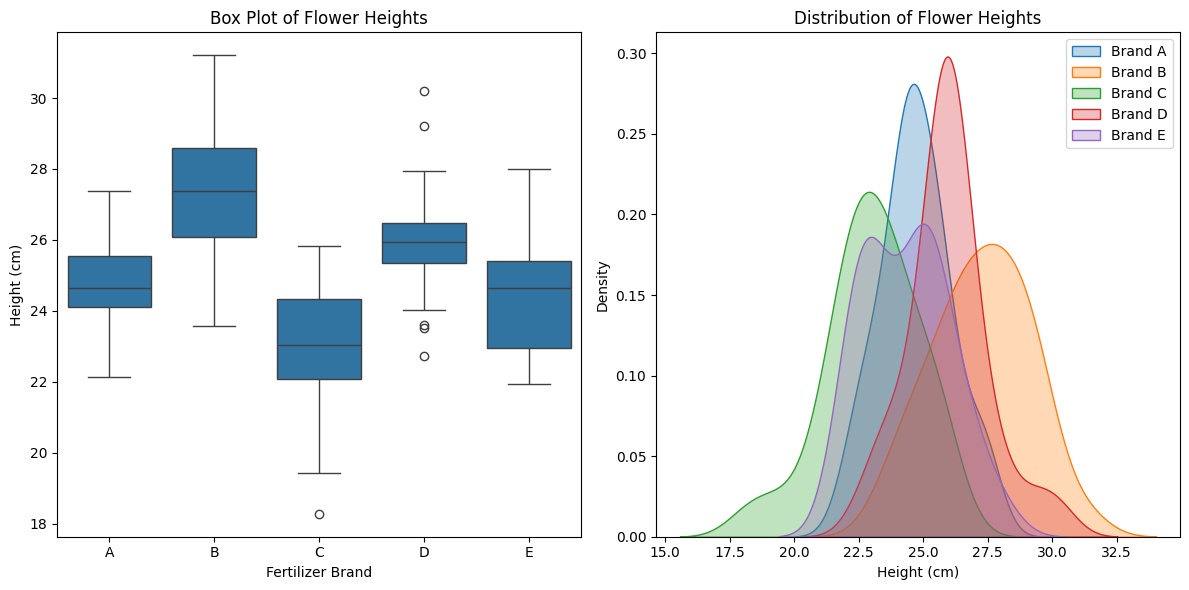


Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9963
p-value: 0.97189354
Residuals are normal (α=0.05): Yes

Levene's Test for Homogeneity of Variances:
Test statistic: 1.3451
p-value: 0.25607983
Equal variances (α=0.05): Yes

Conclusion:
ANOVA test shows significant differences between fertilizer brands.
ANOVA assumptions are met (normal residuals and equal variances).
We can rely on the ANOVA results.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for five fertilizer brands
sample_size = 30

# Create different distributions for each fertilizer
fertilizer_A = np.random.normal(25.0, 1.5, sample_size)
fertilizer_B = np.random.normal(27.5, 2.0, sample_size)
fertilizer_C = np.random.normal(23.0, 1.8, sample_size)
fertilizer_D = np.random.normal(26.0, 1.7, sample_size)
fertilizer_E = np.random.normal(24.5, 1.6, sample_size)

# Create DataFrame
data = []
for brand, heights in zip(['A', 'B', 'C', 'D', 'E'], 
                         [fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D, fertilizer_E]):
    for height in heights:
        data.append({"Fertilizer": brand, "Height": height})

df = pd.DataFrame(data)

# Summary statistics
print("Summary Statistics by Fertilizer Brand:")
print(df.groupby('Fertilizer')['Height'].agg(['count', 'mean', 'std', 'min', 'max']))

# Perform ANOVA test
anova_results = stats.f_oneway(
    fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D, fertilizer_E
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_results.statistic:.4f}")
print(f"p-value: {anova_results.pvalue:.8f}")
print(f"Significant difference (α=0.05): {'Yes' if anova_results.pvalue < 0.05 else 'No'}")

# Create visualizations
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Fertilizer', y='Height', data=df)
plt.title('Box Plot of Flower Heights')
plt.xlabel('Fertilizer Brand')
plt.ylabel('Height (cm)')

# Distribution plot
plt.subplot(1, 2, 2)
for brand, color in zip(['A', 'B', 'C', 'D', 'E'], 
                       ['blue', 'green', 'red', 'purple', 'orange']):
    sns.kdeplot(df[df['Fertilizer'] == brand]['Height'], 
               label=f'Brand {brand}', fill=True, alpha=0.3)
plt.title('Distribution of Flower Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Check if ANOVA assumptions are met
# 1. Calculate residuals
model = df.copy()
group_means = df.groupby('Fertilizer')['Height'].mean().to_dict()
model['group_mean'] = model['Fertilizer'].map(group_means)
model['residual'] = model['Height'] - model['group_mean']

# 2. Test for normality of residuals
shapiro_test = stats.shapiro(model['residual'])
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.8f}")
print(f"Residuals are normal (α=0.05): {'Yes' if shapiro_test[1] >= 0.05 else 'No'}")

# 3. Test for homogeneity of variances
levene_test = stats.levene(
    fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D, fertilizer_E
)
print("\nLevene's Test for Homogeneity of Variances:")
print(f"Test statistic: {levene_test.statistic:.4f}")
print(f"p-value: {levene_test.pvalue:.8f}")
print(f"Equal variances (α=0.05): {'Yes' if levene_test.pvalue >= 0.05 else 'No'}")

print("\nConclusion:")
if anova_results.pvalue < 0.05:
    print("ANOVA test shows significant differences between fertilizer brands.")
    
    # Check if ANOVA assumptions are met
    if shapiro_test[1] >= 0.05 and levene_test.pvalue >= 0.05:
        print("ANOVA assumptions are met (normal residuals and equal variances).")
        print("We can rely on the ANOVA results.")
    else:
        print("ANOVA assumptions are violated.")
        
        # Run Kruskal-Wallis as non-parametric alternative
        kruskal_results = stats.kruskal(
            fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D, fertilizer_E
        )
        print("\nKruskal-Wallis Test Results:")
        print(f"H-statistic: {kruskal_results.statistic:.4f}")
        print(f"p-value: {kruskal_results.pvalue:.8f}")
        print(f"Significant difference (α=0.05): {'Yes' if kruskal_results.pvalue < 0.05 else 'No'}")
else:
    print("ANOVA test does not show significant differences between fertilizer brands.")

Dataset: Flower Heights with Different Fertilizers
--------------------------------------------------
   Flower Fertilizer  Height
0    Rose          A    29.2
1    Rose          B    39.2
2    Rose          C    25.1
3    Rose          D    33.7
4    Rose          E    25.1
5   Tulip          A    23.3
6   Tulip          B    27.3
7   Tulip          C    21.5
8   Tulip          D    28.1
9   Tulip          E    23.4
10   Lily          A    31.6
11   Lily          B    45.9
12   Lily          C    29.9
13   Lily          D    36.3
14   Lily          E    29.5
15  Daisy          A    18.7
16  Daisy          B    23.1
17  Daisy          C    16.1
18  Daisy          D    21.7
19  Daisy          E    17.2

Pivot Table of Heights:
Fertilizer     A     B     C     D     E
Flower                                  
Daisy       18.7  23.1  16.1  21.7  17.2
Lily        31.6  45.9  29.9  36.3  29.5
Rose        29.2  39.2  25.1  33.7  25.1
Tulip       23.3  27.3  21.5  28.1  23.4

Contingency Table

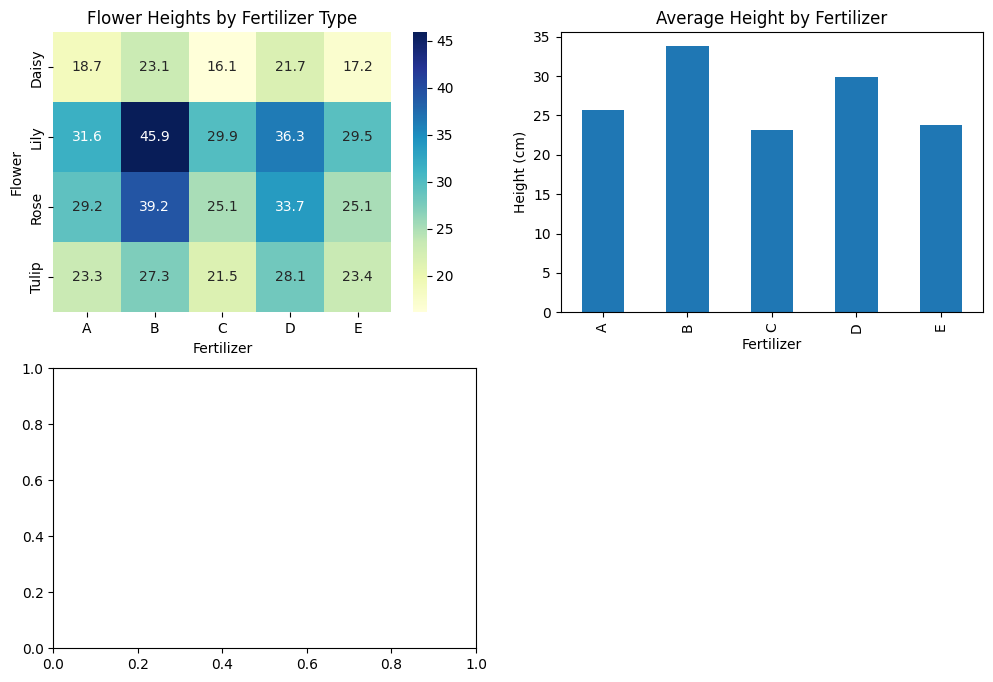

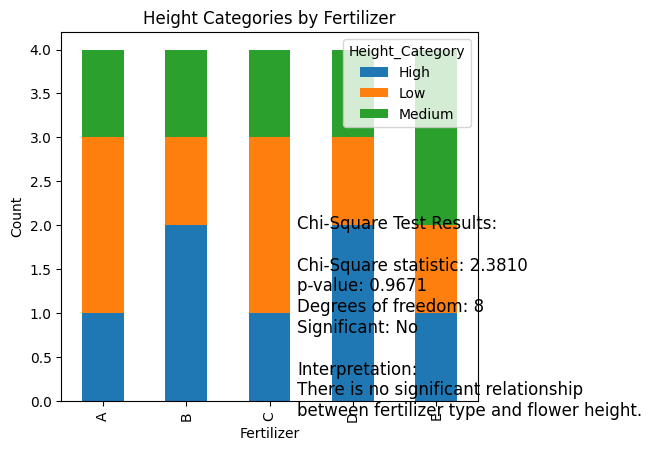


Conclusion:
The chi-square test does not show a significant relationship between fertilizer type and flower height categories.
This suggests that the different fertilizers might not significantly affect flower heights or that the
sample size is too small to detect differences.

Note: For this simple example with only one data point per flower-fertilizer combination,
the chi-square test may not be the most appropriate statistical test.
An ANOVA or Kruskal-Wallis test might be more suitable for continuous height data.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Create data for 4 flower types with 5 fertilizers
fertilizers = ['A', 'B', 'C', 'D', 'E']
flower_types = ['Rose', 'Tulip', 'Lily', 'Daisy']

# Create a dictionary to store the height for each flower-fertilizer pair
heights = {}

# Generate height data with different means for different fertilizers
for flower in flower_types:
    heights[flower] = {}
    for fert in fertilizers:
        # Base heights for each flower type
        base_heights = {'Rose': 30, 'Tulip': 25, 'Lily': 35, 'Daisy': 20}
        
        # Fertilizer effectiveness factors (B is best, C is worst)
        fert_factors = {'A': 1.0, 'B': 1.2, 'C': 0.8, 'D': 1.1, 'E': 0.9}
        
        # Calculate height based on flower type and fertilizer
        mean_height = base_heights[flower] * fert_factors[fert]
        
        # Add some random variation (single value per flower-fertilizer pair)
        heights[flower][fert] = round(mean_height * (0.9 + 0.2 * np.random.random()), 1)

# Convert to DataFrame for easier analysis
data = []
for flower in flower_types:
    for fert in fertilizers:
        data.append({
            'Flower': flower,
            'Fertilizer': fert,
            'Height': heights[flower][fert]
        })

df = pd.DataFrame(data)

# Print the dataset
print("Dataset: Flower Heights with Different Fertilizers")
print("-" * 50)
print(df)

# Create a pivot table for better visualization
pivot_df = df.pivot(index='Flower', columns='Fertilizer', values='Height')
print("\nPivot Table of Heights:")
print(pivot_df)

# Categorize heights into 'low', 'medium', and 'high' for chi-square test
# Define height categories based on quantiles
q1 = df['Height'].quantile(0.33)
q2 = df['Height'].quantile(0.66)

def categorize_height(height):
    if height < q1:
        return 'Low'
    elif height < q2:
        return 'Medium'
    else:
        return 'High'

df['Height_Category'] = df['Height'].apply(categorize_height)

# Create a contingency table
contingency_table = pd.crosstab(df['Fertilizer'], df['Height_Category'])
print("\nContingency Table (Fertilizer vs. Height Category):")
print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant relationship (α=0.05): {'Yes' if p < 0.05 else 'No'}")

# Visualize the data
plt.figure(figsize=(12, 8))

# Heatmap of flower heights
plt.subplot(2, 2, 1)
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Flower Heights by Fertilizer Type')

# Bar plot of average heights per fertilizer
plt.subplot(2, 2, 2)
df.groupby('Fertilizer')['Height'].mean().plot(kind='bar')
plt.title('Average Height by Fertilizer')
plt.ylabel('Height (cm)')

# Stacked bar chart of height categories by fertilizer
plt.subplot(2, 2, 3)
pd.crosstab(df['Fertilizer'], df['Height_Category']).plot(kind='bar', stacked=True)
plt.title('Height Categories by Fertilizer')
plt.ylabel('Count')

# Add a text box with chi-square results
plt.subplot(2, 2, 4)
plt.axis('off')
result_text = (
    f"Chi-Square Test Results:\n\n"
    f"Chi-Square statistic: {chi2:.4f}\n"
    f"p-value: {p:.4f}\n"
    f"Degrees of freedom: {dof}\n"
    f"Significant: {'Yes' if p < 0.05 else 'No'}\n\n"
    f"Interpretation:\n"
    f"{'There is a significant relationship' if p < 0.05 else 'There is no significant relationship'}\n"
    f"between fertilizer type and flower height."
)
plt.text(0.1, 0.5, result_text, fontsize=12, va='center')

plt.tight_layout()
plt.show()

print("\nConclusion:")
if p < 0.05:
    print("The chi-square test indicates a significant relationship between fertilizer type and flower height categories.")
    print("This suggests that different fertilizers do lead to different flower heights.")
else:
    print("The chi-square test does not show a significant relationship between fertilizer type and flower height categories.")
    print("This suggests that the different fertilizers might not significantly affect flower heights or that the")
    print("sample size is too small to detect differences.")

print("\nNote: For this simple example with only one data point per flower-fertilizer combination,")
print("the chi-square test may not be the most appropriate statistical test.")
print("An ANOVA or Kruskal-Wallis test might be more suitable for continuous height data.")

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter nine, stopping before case study 4 (p. 206-227) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.